# AutoGluon AutoML - Vergleich mit Neural Network
## Exakt gleiche Datenaufteilung wie das NN_aktuell.ipynb

Dieses Notebook verwendet die **exakt gleichen Daten** und **identische Datenaufteilung** wie das Neural Network:
- Gleiche Datenquelle: `data2_scaled_custom_new.json`
- Gleiche Train/Validation/Test Split (60%/20%/20%)
- Gleicher Random State (42) für Reproduzierbarkeit
- Gleiches Target: `Creep rupture life`

In [19]:
# ===== IMPORTS =====
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from autogluon.tabular import TabularDataset, TabularPredictor
import os
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

print("📚 All imports successful!")

📚 All imports successful!


In [ ]:
# ===== EXAKT GLEICHE DATENLADUNG WIE NN =====
print("🔄 Lade exakt die gleichen Daten wie das Neural Network...")

# Exakt gleicher Pfad wie im NN
json_path = "./Data/data2_scaled_custom_new.json"

with open(json_path, "r") as f:
    raw_data = json.load(f)

# Erstelle DataFrame (exakt wie im NN)
df = pd.DataFrame(raw_data)
print(f"✅ Daten geladen: {df.shape}")
print(f"📋 Features: {list(df.columns)}")
print(f"🎯 Target: 'Creep rupture life'")

# Zeige erste paar Zeilen
print("\n📊 Erste 5 Zeilen der Daten:")
display(df.head())

print(f"\n📈 Datenstatistiken:")
display(df.describe())

🔄 Lade exakt die gleichen Daten wie das Neural Network...
✅ Daten geladen: (156, 21)
📋 Features: ['Ni', 'Cr', 'Co', 'Fe', 'Al', 'Ti', 'Nb', 'Mo', 'W', 'C', 'B', 'Zr', 'Test temperature (℃)', 'Test stress (Mpa)', 'solution treatment temperature', 'solution treatment time', 'Stable aging temperature (℃)', 'Stable aging time (h)', 'Aging temperature (℃)', 'Aging time (h)', 'Creep rupture life']
🎯 Target: 'Creep rupture life'

📊 Erste 5 Zeilen der Daten:


,Ni,Cr,Co,Fe,Al,Ti,Nb,Mo,W,C,...,Zr,Test temperature (℃),Test stress (Mpa),solution treatment temperature,solution treatment time,Stable aging temperature (℃),Stable aging time (h),Aging temperature (℃),Aging time (h),Creep rupture life
3,0.355671,0.712182,0.834641,0.052436,0.321543,0.449412,0.0,0.432624,0.0,0.338462,...,0.0,0.328,0.440126,0.875536,0.25,0.78,0.063830,1.0,0.053333,0.540244
4,0.355671,0.712182,0.834641,0.052436,0.321543,0.449412,0.0,0.432624,0.0,0.338462,...,0.0,0.660,0.243697,0.875536,0.25,0.78,0.063830,1.0,0.053333,0.362418
6,0.355671,0.712182,0.834641,0.052436,0.321543,0.449412,0.0,0.432624,0.0,0.338462,...,0.0,0.660,0.243697,0.927039,0.25,0.78,0.489362,1.0,0.053333,0.681577
8,0.280614,0.832664,0.882353,0.025723,0.334405,0.545882,0.0,0.450861,0.0,0.307692,...,0.0,0.320,0.474790,0.875536,0.25,0.78,0.063830,1.0,0.053333,0.645733
9,0.280614,0.832664,0.882353,0.025723,0.334405,0.545882,0.0,0.450861,0.0,0.307692,...,0.0,0.320,0.474790,0.875536,0.25,0.78,0.489362,1.0,0.053333,0.480578



📈 Datenstatistiken:


,Ni,Cr,Co,Fe,Al,Ti,Nb,Mo,W,C,...,Zr,Test temperature (℃),Test stress (Mpa),solution treatment temperature,solution treatment time,Stable aging temperature (℃),Stable aging time (h),Aging temperature (℃),Aging time (h),Creep rupture life
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,...,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,0.198768,0.681461,0.459837,0.379971,0.326181,0.346048,0.418281,0.435138,0.169231,0.393984,...,0.331868,0.308487,0.514194,0.774100,0.144832,0.476410,0.171440,0.586538,0.045043,0.613259
std,0.179056,0.226258,0.394237,0.406092,0.254676,0.293161,0.438295,0.220612,0.289730,0.267394,...,0.394604,0.326819,0.233113,0.319473,0.134614,0.258347,0.136681,0.427981,0.136490,0.199339
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.077220,0.424364,0.000000,0.007420,0.063505,0.016471,0.000000,0.310030,0.000000,0.230769,...,0.000000,0.080000,0.473739,0.824034,0.062500,0.280000,0.063830,0.000000,0.000000,0.500293
50%,0.217614,0.795181,0.555556,0.197873,0.329582,0.480000,0.200730,0.344478,0.000000,0.353846,...,0.000000,0.200000,0.621849,0.884120,0.062500,0.440000,0.148936,0.815789,0.026667,0.603670
75%,0.289483,0.805890,0.849673,0.870641,0.553859,0.545882,0.954380,0.447822,0.275000,0.507692,...,0.714286,0.328000,0.632353,0.935622,0.250000,0.780000,0.148936,0.894737,0.053333,0.741528
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
# ===== EXAKT GLEICHE DATENAUFTEILUNG WIE NN =====
print("🔄 Erstelle exakt die gleiche Datenaufteilung wie das Neural Network...")

def create_identical_data_splits(df, test_size=0.2, val_size=0.2, random_state=42):
    """
    Erstellt EXAKT die gleiche Datenaufteilung wie im Neural Network
    
    Args:
        df: DataFrame mit allen Daten
        test_size: Anteil Test-Set (default: 20%)
        val_size: Anteil Validation-Set (default: 20%) 
        random_state: Für Reproduzierbarkeit (42 wie im NN)
        
    Returns:
        train_df, val_df, test_df
    """
    
    # Gesamte Indizes
    all_indices = list(range(len(df)))
    
    # Erster Split: Train+Val vs Test (EXAKT wie im NN)
    train_val_indices, test_indices = train_test_split(
        all_indices, 
        test_size=test_size, 
        random_state=random_state,
        shuffle=True
    )
    
    # Zweiter Split: Train vs Validation (EXAKT wie im NN)
    val_size_adjusted = val_size / (1 - test_size)
    
    train_indices, val_indices = train_test_split(
        train_val_indices,
        test_size=val_size_adjusted,
        random_state=random_state,
        shuffle=True
    )
    
    # Erstelle DataFrames basierend auf Indizes
    train_df = df.iloc[train_indices].copy()
    val_df = df.iloc[val_indices].copy()
    test_df = df.iloc[test_indices].copy()
    
    print(f"✅ IDENTISCHE Datenaufteilung erstellt:")
    print(f"  Training:   {len(train_df):4d} Samples ({len(train_df)/len(df)*100:.1f}%)")
    print(f"  Validation: {len(val_df):4d} Samples ({len(val_df)/len(df)*100:.1f}%)")
    print(f"  Test:       {len(test_df):4d} Samples ({len(test_df)/len(df)*100:.1f}%)")
    print(f"  Total:      {len(df):4d} Samples")
    print(f"🔒 Gleiche Splits wie Neural Network garantiert!")
    
    return train_df, val_df, test_df, train_indices, val_indices, test_indices

# Erstelle identische Aufteilung
train_df, val_df, test_df, train_indices, val_indices, test_indices = create_identical_data_splits(df)

# Speichere Indizes für Verifikation
print(f"\n📋 Gespeicherte Indizes für Verifikation:")
print(f"  Train indices: {len(train_indices)} (z.B. {train_indices[:5]}...)")
print(f"  Val indices:   {len(val_indices)} (z.B. {val_indices[:5]}...)")
print(f"  Test indices:  {len(test_indices)} (z.B. {test_indices[:5]}...)")

🔄 Erstelle exakt die gleiche Datenaufteilung wie das Neural Network...
✅ IDENTISCHE Datenaufteilung erstellt:
  Training:     93 Samples (59.6%)
  Validation:   31 Samples (19.9%)
  Test:         32 Samples (20.5%)
  Total:       156 Samples
🔒 Gleiche Splits wie Neural Network garantiert!

📋 Gespeicherte Indizes für Verifikation:
  Train indices: 93 (z.B. [113, 49, 86, 103, 117]...)
  Val indices:   31 (z.B. [67, 25, 64, 140, 73]...)
  Test indices:  32 (z.B. [96, 69, 82, 76, 114]...)


In [ ]:
# ===== AUTOGLUON SETUP =====
print("🤖 Setup AutoGluon AutoML mit den identischen Daten...")

# Definiere Output-Directory
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
output_dir = f"./AutoML/automl_{timestamp}"
os.makedirs(output_dir, exist_ok=True)
print(f"📁 Output Directory: {output_dir}")

# Target-Spalte
target_column = 'Creep rupture life'

# Kombiniere Train + Validation für AutoGluon Training
# (AutoGluon macht intern weitere Splits für Validation)
train_combined_df = pd.concat([train_df, val_df], ignore_index=True)

print(f"\n📊 Daten für AutoGluon:")
print(f"  Training (inkl. internal validation): {len(train_combined_df)} Samples")
print(f"  Test (für finale Evaluation):        {len(test_df)} Samples")
print(f"  Target: {target_column}")
print(f"  Features: {len(train_combined_df.columns)-1}")

# Konvertiere zu TabularDataset
train_data = TabularDataset(train_combined_df)
test_data = TabularDataset(test_df)

print("✅ AutoGluon Datasets erstellt!")

🤖 Setup AutoGluon AutoML mit den identischen Daten...
📁 Output Directory: /home/bt708583/ml_in_ms_wt24/AdvancedModule/AutoGluon_Models/automl_20250930_130252

📊 Daten für AutoGluon:
  Training (inkl. internal validation): 124 Samples
  Test (für finale Evaluation):        32 Samples
  Target: Creep rupture life
  Features: 20
✅ AutoGluon Datasets erstellt!


In [ ]:
# ===== AUTOGLUON TRAINING =====
print("🚀 Starte AutoGluon AutoML Training...")

# Erstelle Predictor mit erweiterten Einstellungen
predictor = TabularPredictor(
    label=target_column,
    problem_type='regression',
    # eval_metric='r2',  # Gleiche Metrik wie NN (R²)
)

# Training mit verschiedenen Modellen und Zeit-Budget
print("⏰ Starte Training mit 15-Minuten Zeit-Budget...")
fit_summary = predictor.fit(
    train_data,
    time_limit=7200,  
    presets='best_quality',  # Beste Qualität

)

print("✅ AutoGluon Training abgeschlossen!")
print("\n📋 Fit Summary:")
print(fit_summary)

No path specified. Models will be saved in: "AutogluonModels/ag-20250930_130252"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.12.3
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #140-Ubuntu SMP Wed Dec 18 17:59:53 UTC 2024
CPU Count:          192
Memory Avail:       211.17 GB / 1007.45 GB (21.0%)
Disk Space Avail:   885.81 GB / 7096.34 GB (12.5%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be fi

🚀 Starte AutoGluon AutoML Training...
⏰ Starte Training mit 15-Minuten Zeit-Budget...


Leaderboard on holdout data (DyStack):
                     model  score_holdout  score_val              eval_metric  pred_time_test  pred_time_val    fit_time  pred_time_test_marginal  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0    KNeighborsDist_BAG_L1      -0.136777  -0.149833  root_mean_squared_error        0.007456       0.008213    0.001925                 0.007456                0.008213           0.001925            1       True          2
1          CatBoost_BAG_L1      -0.153390  -0.126817  root_mean_squared_error        0.361397       0.015545    5.059904                 0.361397                0.015545           5.059904            1       True          6
2    KNeighborsUnif_BAG_L1      -0.156984  -0.157894  root_mean_squared_error        0.004444       0.038215    0.002399                 0.004444                0.038215           0.002399            1       True          1
3           XGBoost_BAG_L2      -0.169104  -0.133990  root_mean_s

✅ AutoGluon Training abgeschlossen!

📋 Fit Summary:


In [24]:
# ===== MODEL EVALUATION AUF TEST SET =====
print("📊 Evaluiere AutoGluon Modelle auf dem GLEICHEN Test-Set wie das Neural Network...")

# Predictions auf Test Set
test_predictions = predictor.predict(test_data)
test_true = test_df[target_column].values

# Berechne Metriken
test_r2 = r2_score(test_true, test_predictions)
test_mse = mean_squared_error(test_true, test_predictions)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(test_true, test_predictions)

print(f"\n🎯 FINALE TEST-SET PERFORMANCE (identisch mit NN Test-Set):")
print(f"  R² Score:  {test_r2:.6f}")
print(f"  MSE:       {test_mse:.6f}")
print(f"  RMSE:      {test_rmse:.6f}")
print(f"  MAE:       {test_mae:.6f}")

# Model Leaderboard
print("\n🏆 Model Leaderboard:")
leaderboard = predictor.leaderboard(test_data, silent=True)
display(leaderboard)

# Feature Importance
print("\n📈 Feature Importance:")
feature_importance = predictor.feature_importance(test_data)
display(feature_importance.head(10))

TBB Warning: The number of workers is currently limited to 40. The request for 191 workers is ignored. Further requests for more workers will be silently ignored until the limit changes.



📊 Evaluiere AutoGluon Modelle auf dem GLEICHEN Test-Set wie das Neural Network...



🎯 FINALE TEST-SET PERFORMANCE (identisch mit NN Test-Set):
  R² Score:  0.780060
  MSE:       0.007919
  RMSE:      0.088990
  MAE:       0.066381

🏆 Model Leaderboard:


,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,RandomForest_r16_BAG_L2,-0.079514,-0.129587,root_mean_squared_error,0.760181,1.795758,1052.100370,0.036667,0.068338,0.472741,2,True,31
1,RandomForestMSE_BAG_L2,-0.079514,-0.129587,root_mean_squared_error,0.764208,1.791137,1051.965007,0.040694,0.063717,0.337378,2,True,17
2,RandomForest_r195_BAG_L2,-0.079564,-0.130023,root_mean_squared_error,0.763965,1.792421,1052.067429,0.040452,0.065000,0.439800,2,True,20
3,RandomForest_r127_BAG_L2,-0.079641,-0.125772,root_mean_squared_error,0.760028,1.828918,1052.020103,0.036514,0.101498,0.392473,2,True,24
4,RandomForest_r39_BAG_L2,-0.079720,-0.126446,root_mean_squared_error,0.759047,1.814940,1052.034403,0.035534,0.087519,0.406774,2,True,22
5,RandomForest_r15_BAG_L2,-0.080097,-0.124648,root_mean_squared_error,0.773968,1.789261,1051.964227,0.050454,0.061840,0.336598,2,True,29
6,RandomForest_r166_BAG_L2,-0.084730,-0.116908,root_mean_squared_error,0.759956,1.825563,1052.025394,0.036443,0.098142,0.397765,2,True,28
7,ExtraTrees_r172_BAG_L2,-0.085047,-0.119907,root_mean_squared_error,0.759344,1.801947,1051.895912,0.035831,0.074526,0.268283,2,True,21
8,LightGBMLarge_BAG_L1,-0.085198,-0.129623,root_mean_squared_error,0.056473,0.213798,1450.102432,0.056473,0.213798,1450.102432,1,True,10
9,ExtraTrees_r42_BAG_L1,-0.086015,-0.124994,root_mean_squared_error,0.039805,0.064449,0.373688,0.039805,0.064449,0.373688,1,True,12


Computing feature importance via permutation shuffling for 20 features using 32 rows with 5 shuffle sets...



📈 Feature Importance:


	118.56s	= Expected runtime (23.71s per shuffle set)
2025-09-30 14:41:05,575	ERROR worker.py:422 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): ray::_ray_fit() (pid=828435, ip=172.17.0.5)
  File "/home/bt708583/.local/lib/python3.12/site-packages/autogluon/core/models/ensemble/fold_fitting_strategy.py", line 413, in _ray_fit
    fold_model.fit(X=X_fold, y=y_fold, X_val=X_val_fold, y_val=y_val_fold, time_limit=time_limit_fold, **resources, **kwargs_fold)
  File "/home/bt708583/.local/lib/python3.12/site-packages/autogluon/core/models/abstract/abstract_model.py", line 925, in fit
    out = self._fit(**kwargs)
          ^^^^^^^^^^^^^^^^^^^
  File "/home/bt708583/.local/lib/python3.12/site-packages/autogluon/tabular/models/tabular_nn/torch/tabular_nn_torch.py", line 201, in _fit
    train_dataset = self._generate_dataset(X, y, train_params=processor_kwargs, is_train=True)
                    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  F

,importance,stddev,p_value,n,p99_high,p99_low
Test temperature (℃),0.074080,0.013362,0.000122,5,0.101592,0.046568
Ti,0.053065,0.009513,0.000119,5,0.072652,0.033478
solution treatment temperature,0.030335,0.009299,0.000939,5,0.049482,0.011189
Stable aging temperature (℃),0.012895,0.006683,0.006252,5,0.026656,-0.000867
Nb,0.009078,0.003986,0.003510,5,0.017286,0.000871
solution treatment time,0.006731,0.003627,0.007132,5,0.014200,-0.000737
Mo,0.006268,0.001866,0.000840,5,0.010110,0.002427
Fe,0.004467,0.003008,0.014674,5,0.010660,-0.001726
Aging temperature (℃),0.004298,0.002709,0.011927,5,0.009876,-0.001280
Ni,0.003352,0.002048,0.010795,5,0.007570,-0.000865


📊 Erstelle Visualisierungen für Vergleich mit Neural Network...
💾 Jeder Plot wird einzeln als PNG gespeichert...
📊 Parity Plot gespeichert: /home/bt708583/ml_in_ms_wt24/AdvancedModule/AutoGluon_Models/automl_20250930_130252/individual_plots/01_parity_plot.png
📊 Parity Plot gespeichert: /home/bt708583/ml_in_ms_wt24/AdvancedModule/AutoGluon_Models/automl_20250930_130252/individual_plots/01_parity_plot.png


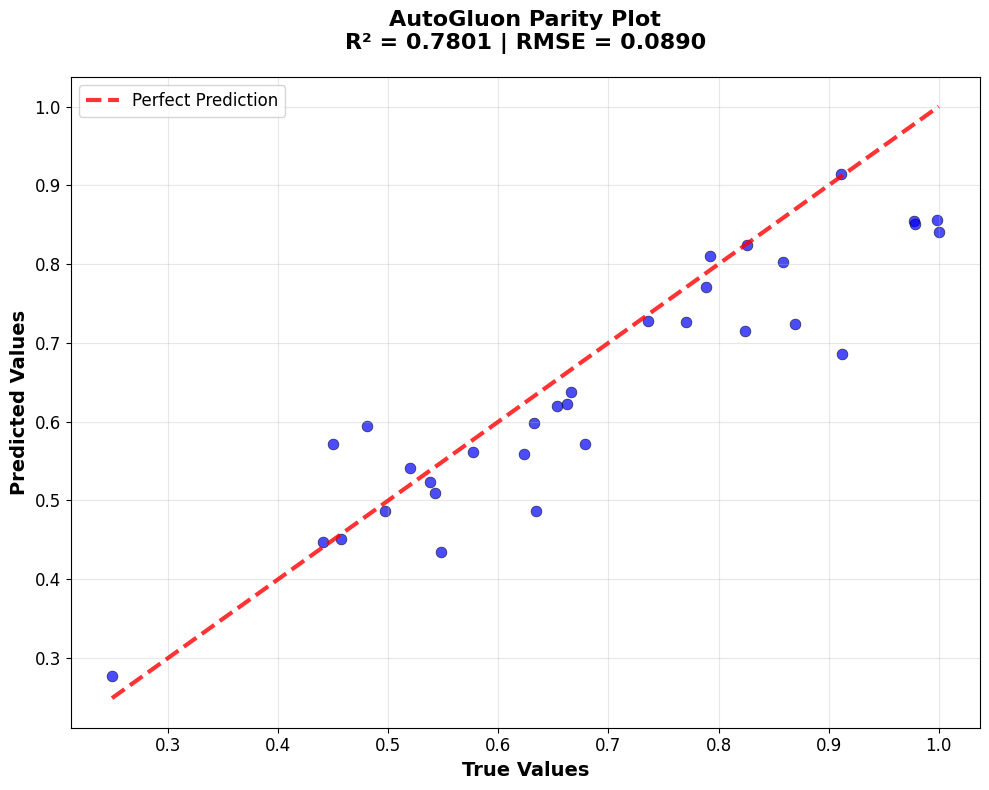

📊 Residuals Plot gespeichert: /home/bt708583/ml_in_ms_wt24/AdvancedModule/AutoGluon_Models/automl_20250930_130252/individual_plots/02_residuals_plot.png


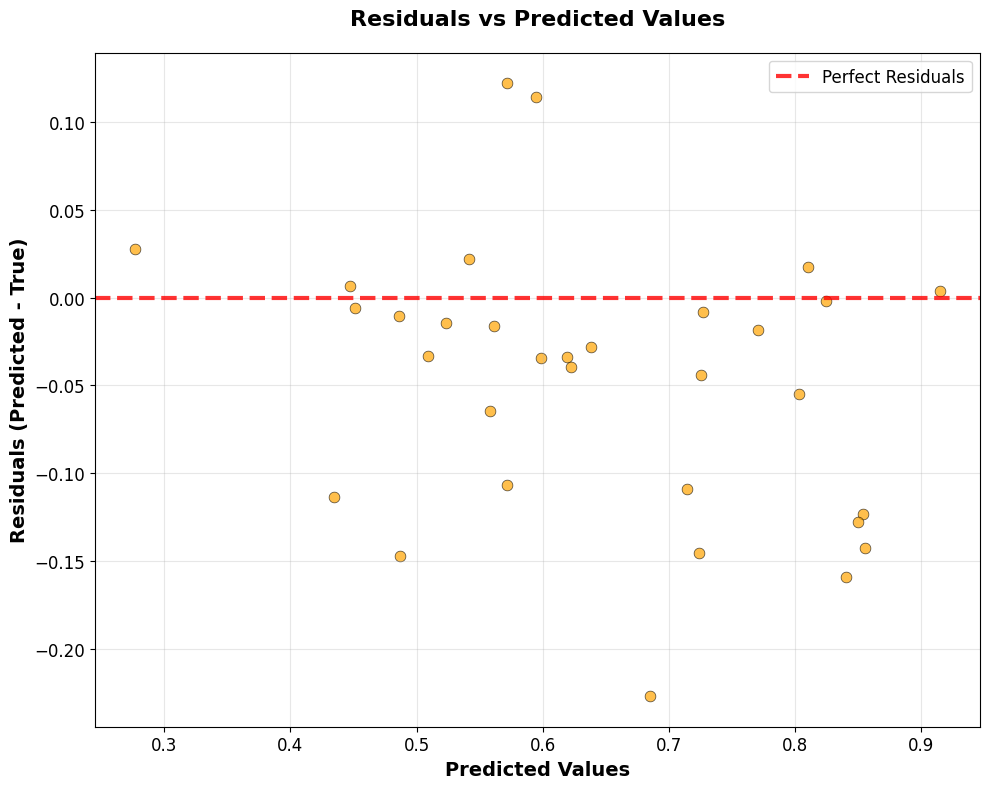

📊 Residuals Histogram gespeichert: /home/bt708583/ml_in_ms_wt24/AdvancedModule/AutoGluon_Models/automl_20250930_130252/individual_plots/03_residuals_histogram.png


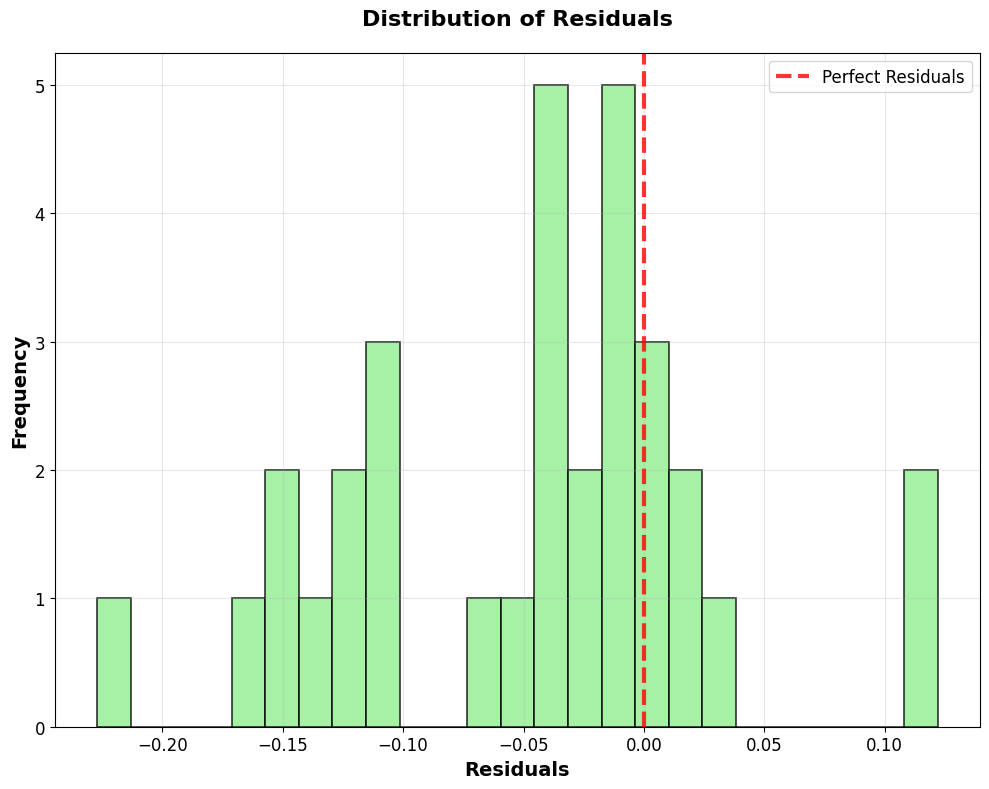

📊 Feature Importance gespeichert: /home/bt708583/ml_in_ms_wt24/AdvancedModule/AutoGluon_Models/automl_20250930_130252/individual_plots/04_feature_importance.png


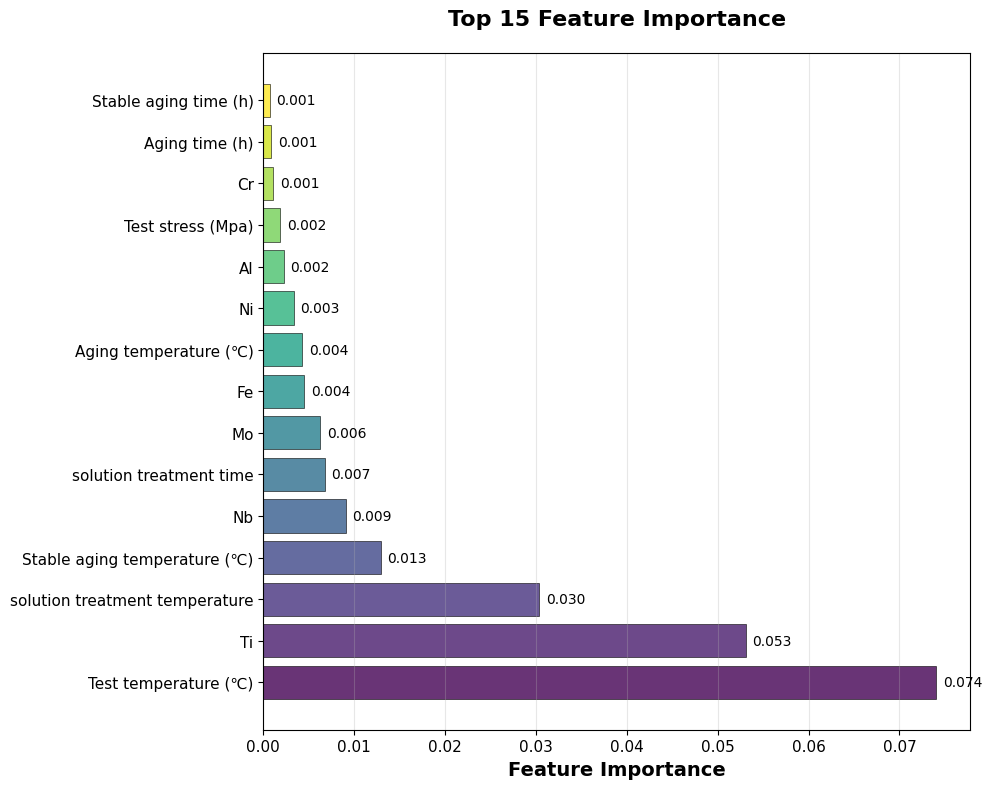

📊 Model Comparison gespeichert: /home/bt708583/ml_in_ms_wt24/AdvancedModule/AutoGluon_Models/automl_20250930_130252/individual_plots/05_model_comparison.png


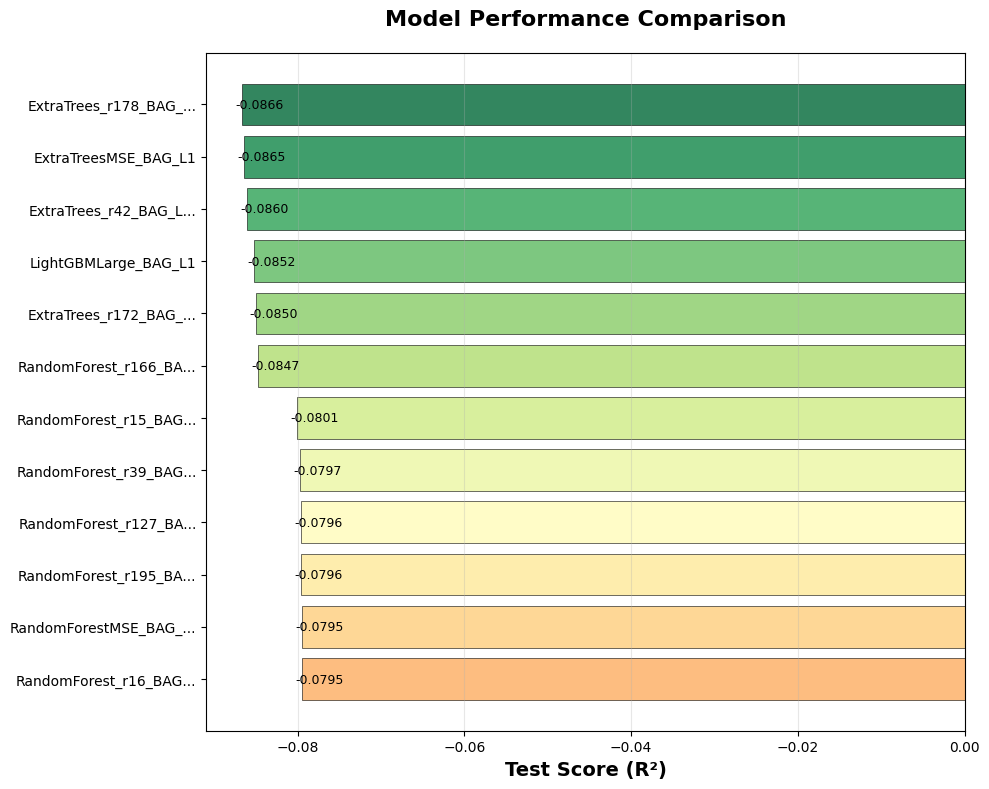

📊 Metrics Summary gespeichert: /home/bt708583/ml_in_ms_wt24/AdvancedModule/AutoGluon_Models/automl_20250930_130252/individual_plots/06_metrics_summary.png


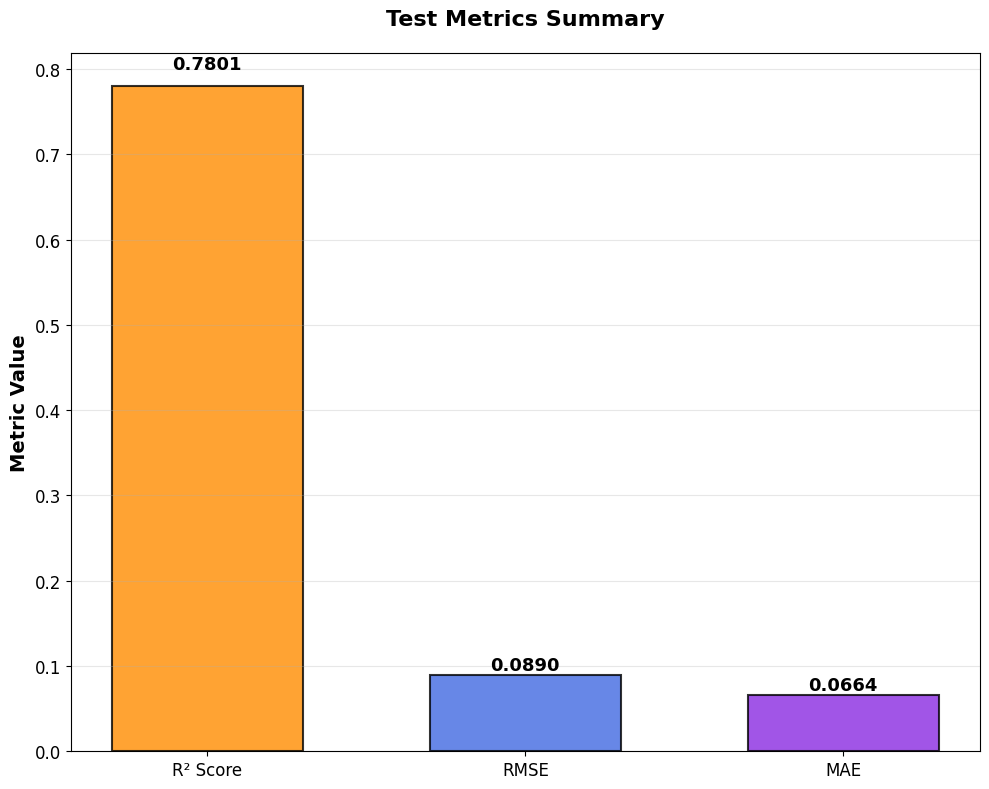


✅ Alle 6 Plots einzeln gespeichert in: /home/bt708583/ml_in_ms_wt24/AdvancedModule/AutoGluon_Models/automl_20250930_130252/individual_plots
📊 Plot-Dateien:
  1. 01_parity_plot.png
  2. 02_residuals_plot.png
  3. 03_residuals_histogram.png
  4. 04_feature_importance.png
  5. 05_model_comparison.png
  6. 06_metrics_summary.png
✅ Alle Visualisierungen erstellt!


In [25]:
# ===== VISUALIZATIONS - EINZELNE PLOTS =====
print("📊 Erstelle Visualisierungen für Vergleich mit Neural Network...")
print("💾 Jeder Plot wird einzeln als PNG gespeichert...")

# Setup für Plots
plt.style.use('default')
individual_fig_size = (10, 8)
residuals = test_predictions - test_true

# Create plots directory
plots_dir = os.path.join(output_dir, 'individual_plots')
os.makedirs(plots_dir, exist_ok=True)

# ===== 1. PARITY PLOT (mit R² und RMSE) =====
plt.figure(figsize=individual_fig_size)
plt.scatter(test_true, test_predictions, alpha=0.7, s=60, color='blue', edgecolor='black', linewidth=0.5)
# Perfect prediction line
min_val = min(test_true.min(), test_predictions.min())
max_val = max(test_true.max(), test_predictions.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=3, label='Perfect Prediction', alpha=0.8)
plt.xlabel('True Values', fontsize=14, fontweight='bold')
plt.ylabel('Predicted Values', fontsize=14, fontweight='bold')
plt.title(f'AutoGluon Parity Plot\nR² = {test_r2:.4f} | RMSE = {test_rmse:.4f}', 
         fontsize=16, fontweight='bold', pad=20)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tick_params(axis='both', which='major', labelsize=12)
# Tight layout
plt.tight_layout()
# Save
parity_path = os.path.join(plots_dir, '01_parity_plot.png')
plt.savefig(parity_path, dpi=300, bbox_inches='tight', facecolor='white')
print(f"📊 Parity Plot gespeichert: {parity_path}")
plt.show()
plt.close()

# ===== 2. RESIDUALS PLOT =====
plt.figure(figsize=individual_fig_size)
plt.scatter(test_predictions, residuals, alpha=0.7, s=60, color='orange', edgecolor='black', linewidth=0.5)
plt.axhline(y=0, color='r', linestyle='--', lw=3, alpha=0.8, label='Perfect Residuals')
plt.xlabel('Predicted Values', fontsize=14, fontweight='bold')
plt.ylabel('Residuals (Predicted - True)', fontsize=14, fontweight='bold')
plt.title('Residuals vs Predicted Values', fontsize=16, fontweight='bold', pad=20)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tight_layout()
# Save
residuals_path = os.path.join(plots_dir, '02_residuals_plot.png')
plt.savefig(residuals_path, dpi=300, bbox_inches='tight', facecolor='white')
print(f"📊 Residuals Plot gespeichert: {residuals_path}")
plt.show()
plt.close()

# ===== 3. RESIDUALS HISTOGRAM =====
plt.figure(figsize=individual_fig_size)
plt.hist(residuals, bins=25, alpha=0.8, edgecolor='black', color='lightgreen', linewidth=1.2)
plt.axvline(x=0, color='r', linestyle='--', lw=3, alpha=0.8, label='Perfect Residuals')
plt.xlabel('Residuals', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.title('Distribution of Residuals', fontsize=16, fontweight='bold', pad=20)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tight_layout()
# Save
residuals_hist_path = os.path.join(plots_dir, '03_residuals_histogram.png')
plt.savefig(residuals_hist_path, dpi=300, bbox_inches='tight', facecolor='white')
print(f"📊 Residuals Histogram gespeichert: {residuals_hist_path}")
plt.show()
plt.close()

# ===== 4. FEATURE IMPORTANCE =====
plt.figure(figsize=individual_fig_size)
top_features = feature_importance.head(15)  # Mehr Features zeigen
colors = plt.cm.viridis(np.linspace(0, 1, len(top_features)))
bars = plt.barh(range(len(top_features)), top_features['importance'], color=colors, alpha=0.8, edgecolor='black', linewidth=0.5)
plt.yticks(range(len(top_features)), top_features.index, fontsize=11)
plt.xlabel('Feature Importance', fontsize=14, fontweight='bold')
plt.title('Top 15 Feature Importance', fontsize=16, fontweight='bold', pad=20)
plt.grid(True, alpha=0.3, axis='x')
plt.tick_params(axis='both', which='major', labelsize=11)
# Add value labels on bars
for i, (bar, value) in enumerate(zip(bars, top_features['importance'])):
    plt.text(value + max(top_features['importance'])*0.01, bar.get_y() + bar.get_height()/2, 
             f'{value:.3f}', ha='left', va='center', fontsize=10)
plt.tight_layout()
# Save
feature_importance_path = os.path.join(plots_dir, '04_feature_importance.png')
plt.savefig(feature_importance_path, dpi=300, bbox_inches='tight', facecolor='white')
print(f"📊 Feature Importance gespeichert: {feature_importance_path}")
plt.show()
plt.close()

# ===== 5. MODEL PERFORMANCE COMPARISON =====
plt.figure(figsize=individual_fig_size)
top_models = leaderboard.head(12)  # Mehr Modelle zeigen
colors = plt.cm.RdYlGn(np.linspace(0.3, 1, len(top_models)))
bars = plt.barh(range(len(top_models)), top_models['score_test'], color=colors, alpha=0.8, edgecolor='black', linewidth=0.5)
model_names_short = [name[:20] + '...' if len(name) > 20 else name for name in top_models['model']]
plt.yticks(range(len(top_models)), model_names_short, fontsize=10)
plt.xlabel('Test Score (R²)', fontsize=14, fontweight='bold')
plt.title('Model Performance Comparison', fontsize=16, fontweight='bold', pad=20)
plt.grid(True, alpha=0.3, axis='x')
plt.tick_params(axis='both', which='major', labelsize=10)
# Add value labels on bars
for i, (bar, value) in enumerate(zip(bars, top_models['score_test'])):
    plt.text(value + max(top_models['score_test'])*0.01, bar.get_y() + bar.get_height()/2, 
             f'{value:.4f}', ha='left', va='center', fontsize=9)
plt.tight_layout()
# Save
model_comparison_path = os.path.join(plots_dir, '05_model_comparison.png')
plt.savefig(model_comparison_path, dpi=300, bbox_inches='tight', facecolor='white')
print(f"📊 Model Comparison gespeichert: {model_comparison_path}")
plt.show()
plt.close()

# ===== 6. ERROR METRICS SUMMARY =====
plt.figure(figsize=individual_fig_size)
metrics = ['R² Score', 'RMSE', 'MAE']
values = [test_r2, test_rmse, test_mae]
colors = ['#2E8B57' if test_r2 > 0.8 else '#FF8C00' if test_r2 > 0.6 else '#DC143C', '#4169E1', '#8A2BE2']
bars = plt.bar(metrics, values, color=colors, alpha=0.8, edgecolor='black', linewidth=1.5, width=0.6)
plt.title('Test Metrics Summary', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Metric Value', fontsize=14, fontweight='bold')
plt.tick_params(axis='both', which='major', labelsize=12)
# Annotate bars with values
for bar, value in zip(bars, values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + height*0.02,
            f'{value:.4f}', ha='center', va='bottom', fontsize=13, fontweight='bold')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
# Save
metrics_summary_path = os.path.join(plots_dir, '06_metrics_summary.png')
plt.savefig(metrics_summary_path, dpi=300, bbox_inches='tight', facecolor='white')
print(f"📊 Metrics Summary gespeichert: {metrics_summary_path}")
plt.show()
plt.close()

print(f"\n✅ Alle 6 Plots einzeln gespeichert in: {plots_dir}")
print("📊 Plot-Dateien:")
for i, filename in enumerate(['01_parity_plot.png', '02_residuals_plot.png', '03_residuals_histogram.png', 
                              '04_feature_importance.png', '05_model_comparison.png', '06_metrics_summary.png'], 1):
    print(f"  {i}. {filename}")
print("✅ Alle Visualisierungen erstellt!")